<a href="https://colab.research.google.com/github/mahirag/Machine-Learning/blob/main/KNN_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [133]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [134]:
import pandas as pd
import numpy as np
# For scaling data
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


In [135]:
filename = '/content/drive/My Drive/abalone.data'
df = pd.read_csv(filename)
df

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [136]:
df.columns = ['Sex', 'Length', 'Diameter', 'Height' , 'Shucked Weight', 'Whole Weight', 'Viscera Weight', 'Shell Weight', 'Rings']
df.head()

,Sex,Length,Diameter,Height,Shucked Weight,Whole Weight,Viscera Weight,Shell Weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [137]:
df['Sex'] = df['Sex'].replace({'M': 0, 'F': 1, 'I': 2})

In [138]:
# by using normalize = True with value_counts, our output is the percentage of each class (written as a decimal)
df['Sex'].value_counts(normalize = True)

0    0.365661
2    0.321360
1    0.312979
Name: Sex, dtype: float64

In [139]:
#Arrange data into a features matrix and target vector
X = df.loc[:, ['Length', 'Diameter', 'Height', 'Shucked Weight', 'Whole Weight', 'Viscera Weight', 'Shell Weight', 'Rings']]

In [140]:
# Features Matrix needs to be at 2 dimensional
X.shape

(4176, 8)

In [141]:
y = df['Sex']
df_drop =df.drop(columns=['Sex'])
X = np.array(df_drop)

In [142]:
y.shape

(4176,)

In [143]:
#Standardize Data

scaler = StandardScaler()
# Fit on X (assuming your features matrix is a NumPy array)
scaler.fit(X)
# Transform X
X = scaler.transform(X);

K-Nearest Neighbors

In [144]:
#Step 1: Import the model you want to use
from sklearn.neighbors import KNeighborsClassifier

In [145]:
#Make an instance of the Model
knn = KNeighborsClassifier(n_neighbors=1)

In [146]:
# Looking at some hyperparameters that seem tunable
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')


In [147]:
#Step 3: Training the model on the data, storing the information learned from the data

#Model is learning the relationship between x and y

knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [148]:
#Step 4: Predict the values of same data it was fit on.

predictions = knn.predict(X)

In [149]:
predictions

array([0, 1, 0, ..., 0, 1, 0])

In [150]:
# calculate classification accuracy
score = knn.score(X, y)
score

1.0

In [152]:
y = df['Sex']
X = df.drop(columns = 'Sex')

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [154]:
dec_tree = DecisionTreeClassifier(random_state = 42)

In [157]:
dec_tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [158]:
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [159]:
dec_tree.predict(X_test)

array([0, 1, 0, ..., 0, 1, 1])

In [160]:
# calculate classification accuracy
train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)
print(train_score)
print(test_score)

1.0
0.5076628352490421


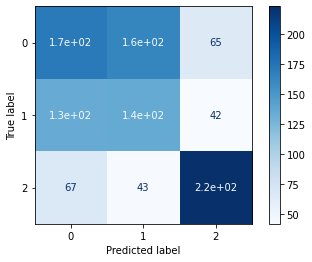

In [161]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dec_tree, X_test, y_test, cmap = 'Blues');

1) Is this a balanced data set?

Ans: Yes

3) What is the accuracy of your default model?

Ans: 1

4) What is the optimal accuracy you can achieve by tuning the value of K using KNN?

Ans: 1